• Python 실습

▪ 추가 개인 실습 (1시간 소요)

 ▶인공 신경망과 다중 선형 회귀 모델의 성능을 비교하세요.
 1. train.csv를 Pandas를 사용하여 읽어온 후 df 변수에 저장하세요.
 2. critical_temp 컬럼을 목표 변수 y로, 나머지 컬럼들을 입력 변수 x로 설정하세요.
 3. 입력 변수 x에 표준화를 적용하세요. (Scikit-Learn의 StandardScaler 사용)
 4. x와 y를 훈련 및 시험 데이터셋으로 나누세요. (Scikit-Learn의 train_test_split 사용)- test_size → 0.2- random_state → 42
 5. 훈련 데이터셋을 사용하여 TwoLayerNeuralNetwork 모델을 훈련하세요.- Seed → 42- Hidden Layer Nodes → [20, 40, 80] (3 Independent Models)- Epoch → 200- Batch Size → 128- Learning Rate → 1e-4
 6.  각 모델별로 손실 함수 그래프를 출력하세요. (Training Loss vs. Test Loss)
 7.  손실 함수가 가장 작은 상태에서 얻은 모델 파라미터 및 시험 데이터셋을 사용하여 결과를 추론하세요.
 8.  추론한 결과를 사용하여 각 모델별로 Mean Squared Loss (MSE)를 계산하세요.
 9. 활성화 함수를 바꾸어 가면서 동일한 Process를 진행하세요.(skip)
 10. 4번에서 얻은 데이터셋을 기반으로 다중 선형 회귀 분석을 진행하세요.
 11. 9번에서 얻은 모델 파라미터 및 시험 데이터셋을 사용하여 결과를 추론하세요.
 12. 추론한 결과를 사용하여 다중 선형 회귀 모델의 Mean Squared Loss (MSE)를 계산하세요


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/train.csv')

In [9]:
y = df['critical_temp']
x = df.drop(columns=['critical_temp'])

In [10]:
print("df shape:", df.shape)
print("x shape:", x.shape)
print("y shape:", y.shape)
print(x.head())
print(y.head())

df shape: (21263, 82)
x shape: (21263, 81)
y shape: (21263,)
   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.79492

입력 변수 x에 표준화 적용

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
print("원본 x shape:", x.shape)
print("표준화된 x_scaled shape:", x_scaled.shape)

원본 x shape: (21263, 81)
표준화된 x_scaled shape: (21263, 81)


In [15]:
print(x_scaled[:5])

[[-0.0800575   0.04673292 -0.45165095 -0.15884974 -0.61181933  0.0443582
  -0.00370685  0.13372518 -0.05303856  0.37818567  0.60924008  0.06641302
   0.97593034 -0.2466868   0.87874586  0.0177911  -0.4048925   0.769935
   1.12690211  0.98377963  1.02805443  0.11251899 -1.01405732 -0.37675734
  -1.01740958 -0.0226741   0.18642356  0.97627984 -0.24146069  1.03224826
   0.66795097 -0.51185535 -0.71577627 -0.73875613 -0.77073581 -0.11478314
  -0.12959502  0.07154747 -0.55167834 -0.06617402  0.1572354   0.17897212
   0.58897868  0.19870128  0.85309381  0.2604578   0.05813403  0.10765927
   0.7566284   0.11598452 -0.09060537 -0.65404102 -0.70040927 -0.66140714
  -0.69288746 -0.01268248  0.2186708  -0.40554428 -0.56720444 -0.42948645
  -0.41858233  0.46862246 -0.45111401 -0.66882136 -0.66399468 -1.28687936
  -0.87085749  0.93938338 -0.11375547  1.16242254  0.66369283 -0.90775451
  -0.75215608 -0.8059123  -0.71170467  0.18629193  0.03518324 -0.83795916
  -0.40616628 -0.83837245 -0.52006971]
 [

데이터셋 분리

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y,
    test_size=0.2,
    random_state=42
)

In [20]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (17010, 81)
x_test shape: (4253, 81)
y_train shape: (17010,)
y_test shape: (4253,)


In [22]:
import numpy as np
class TwoLayerNeuralNetwork :
  def __init__(self, input_dim:int, hidden_dim:int, output_dim:int, seed:int) :
    # Initialize Variables
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    self.seed = seed

    # Initialize Model Parameters
    self.init_weights() # 인스턴스화가 진행되면 동시에 실행

  def init_weights(self) :
    # Fix Seed
    np.random.seed(self.seed)

    # Initialize Model Parameters
    self.layer1_weights = np.random.random((self.input_dim, self.hidden_dim))
    self.layer2_weights = np.random.random((self.hidden_dim, self.output_dim))

    # Print Model Parameters
    print("Model Parameters Initialized!")
    print(f"# Parameters : {self.layer1_weights.size + self.layer2_weights.size}")
    print(f"Layer 1 Size : {self.layer1_weights.shape}")
    print(f"Layer 1 Weights: {self.layer1_weights.flatten()}")
    print(f"Layer 2 Size : {self.layer2_weights.shape}")
    print(f"Layer 2 Weights: {self.layer2_weights.flatten()}")

  def LeakyReLU(self, input:np.array)->np.array :
    # 코드를 작성해주세요
    output = np.where(input>0, input, 0.2 * input)
    return output

  def predict(self, input:np.array)->np.array :
    output = self.LeakyReLU(np.matmul(input, self.layer1_weights))
    output = np.matmul(output, self.layer2_weights)
    return output

  def compute_mse_loss(self, pred:np.array, target:np.array)->float :
    return np.power(target-pred, 2).mean()

  def back_prop(self, input:np.array, target:np.array)->np.array :
    # Compute Each Layer Output
    stg1_output = np.matmul(input, self.layer1_weights)
    stg2_output = self.LeakyReLU(stg1_output)
    stg3_output = np.matmul(stg2_output, self.layer2_weights)

    # Compute Gradient of Each Parameter
    grad_layer2 = -np.matmul(stg2_output.reshape(-1,1), (target-stg3_output).reshape(1,-1))
    grad_layer1 = -np.matmul(input.reshape(-1,1), (target-stg3_output).mean() * (self.layer2_weights*np.where(stg2_output>0, 1, 0.2)).sum(axis=1).reshape(1,-1))

    return grad_layer1, grad_layer2

  def train(self, input_train:np.array, target_train:np.array, input_test:np.array, target_test:np.array, batch_size:int, lr:float)->list :
    # Create List Instance
    train_loss_list, test_loss_list = [], []

    # Initialize Varaibles
    loss = 0

    # Compute Iteration
    iteration = len(input_train) // batch_size

    print("Training Phase")
    with tqdm(total = iteration) as p_bar :
      for i in range(iteration) :
        # Initialize Varaibles
        grad_layer1, grad_layer2 = 0, 0
        input_train_mini_batch, input_target_mini_batch = input_train[i*batch_size : (i+1)*batch_size], target_train[i*batch_size : (i+1)*batch_size]

        for j in range(batch_size) :
          # Feed Forward
          pred = self.predict(input_train_mini_batch[j])

          # Compute MSE Loss
          loss += self.compute_mse_loss(pred, input_target_mini_batch[j])

          # Compute Gradient of Each Data
          sub_grad_layer1, sub_grad_layer2 = self.back_prop(input_train_mini_batch[j], input_target_mini_batch[j])
          grad_layer1 += sub_grad_layer1
          grad_layer2 += sub_grad_layer2

        # Compute Average Gradient
        grad_layer1 /= batch_size
        grad_layer2 /= batch_size

        # Update Model Parameters
        self.layer1_weights -= lr * grad_layer1
        self.layer2_weights -= lr * grad_layer2

        # Update TQDM Bar
        p_bar.update()

    # Compute Average Loss
    loss /= len(input_train)
    train_loss_list.append(loss)

    # Initialize Varaibles
    loss = 0

    # Compute Iteration
    iteration = len(input_test) // batch_size

    print("Test Phase")
    with tqdm(total = iteration) as p_bar :
      for i in range(iteration) :
        # Initialize Varaibles
        test_train_mini_batch, test_target_mini_batch = input_test[i*batch_size : (i+1)*batch_size], target_test[i*batch_size : (i+1)*batch_size]

        for j in range(batch_size) :
          # Feed Forward
          pred = self.predict(test_train_mini_batch[j])

          # Compute MSE Loss
          loss += self.compute_mse_loss(pred, test_target_mini_batch[j])

        # Update TQDM Bar
        p_bar.update()

     # Compute Average Loss
      loss /= len(input_test)
      test_loss_list.append(loss)

    return train_loss_list, test_loss_list

In [23]:
input_dim = x_train.shape[1]
hidden_dim = 40   # 예: 은닉층 노드수 (20, 40, 80 중 하나)
output_dim = 1
seed = 42

In [24]:
model = TwoLayerNeuralNetwork(
    input_dim=input_dim,
    hidden_dim=hidden_dim,
    output_dim=output_dim,
    seed=seed
)

Model Parameters Initialized!
# Parameters : 3280
Layer 1 Size : (81, 40)
Layer 1 Weights: [0.37454012 0.95071431 0.73199394 ... 0.9598628  0.61630049 0.55687844]
Layer 2 Size : (40, 1)
Layer 2 Weights: [0.4157751  0.42894433 0.540905   0.69642981 0.7021461  0.17169391
 0.50011275 0.4119581  0.87052697 0.63141892 0.53250407 0.11539464
 0.60563789 0.11720391 0.33720658 0.14284196 0.69207365 0.20625211
 0.39185937 0.89567478 0.20431638 0.50780506 0.41927166 0.01812404
 0.79275811 0.06904591 0.47425502 0.56067829 0.62842646 0.68863163
 0.25327238 0.00997878 0.72344366 0.5356566  0.8361177  0.82138836
 0.84332617 0.48509466 0.3336284  0.7915582 ]


In [32]:
from tqdm.notebook import tqdm

In [33]:
num_epoch = 200

In [34]:
batch_size, lr = 128, 1e-4

In [37]:
# 데이터 준비
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test)
y_test = np.array(y_test).reshape(-1, 1)


In [38]:
def train_model(model, num_epoch, batch_size, lr) :
  train_loss_list, test_loss_list = [],[]
  best_loss = np.inf

  for epoch in range(num_epoch) :
    print(f"[Current Epoch : {epoch + 1}]")
    train_loss, test_loss = model.train(x_train, y_train, x_test, y_test, batch_size, lr)
    train_loss_list += train_loss
    test_loss_list += test_loss

    if test_loss[0] < best_loss :
      best_loss = test_loss[0]
      best_weight = [model.layer1_weights, model.layer2_weights]

  return train_loss_list, test_loss_list, best_weight


In [39]:
train_loss_list, test_loss_list, best_weight = train_model(model, num_epoch, batch_size, lr)

[Current Epoch : 1]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 2]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 3]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 4]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 5]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 6]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 7]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 8]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 9]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 10]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 11]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 12]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 13]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 14]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 15]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 16]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 17]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 18]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 19]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 20]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 21]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 22]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 23]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 24]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 25]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 26]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 27]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 28]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 29]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 30]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 31]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 32]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 33]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 34]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 35]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 36]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 37]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 38]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 39]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 40]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 41]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 42]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 43]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 44]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 45]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 46]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 47]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 48]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 49]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 50]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 51]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 52]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 53]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 54]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 55]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 56]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 57]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 58]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 59]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 60]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 61]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 62]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 63]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 64]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 65]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 66]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 67]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 68]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 69]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 70]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 71]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 72]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 73]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 74]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 75]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 76]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 77]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 78]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 79]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 80]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 81]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 82]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 83]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 84]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 85]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 86]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 87]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 88]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 89]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 90]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 91]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 92]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 93]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 94]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 95]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 96]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 97]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 98]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 99]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 100]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 101]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 102]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 103]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 104]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 105]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 106]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 107]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 108]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 109]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 110]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 111]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 112]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 113]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 114]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 115]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 116]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 117]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 118]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 119]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 120]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 121]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 122]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 123]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 124]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 125]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 126]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 127]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 128]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 129]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 130]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 131]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 132]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 133]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 134]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 135]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 136]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 137]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 138]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 139]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 140]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 141]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 142]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 143]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 144]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 145]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 146]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 147]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 148]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 149]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 150]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 151]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 152]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 153]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 154]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 155]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 156]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 157]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 158]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 159]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 160]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 161]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 162]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 163]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 164]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 165]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 166]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 167]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 168]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 169]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 170]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 171]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 172]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 173]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 174]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 175]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 176]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 177]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 178]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 179]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 180]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 181]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 182]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 183]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 184]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 185]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 186]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 187]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 188]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 189]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 190]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 191]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 192]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 193]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 194]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 195]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 196]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 197]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 198]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 199]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

[Current Epoch : 200]
Training Phase


  0%|          | 0/132 [00:00<?, ?it/s]

Test Phase


  0%|          | 0/33 [00:00<?, ?it/s]

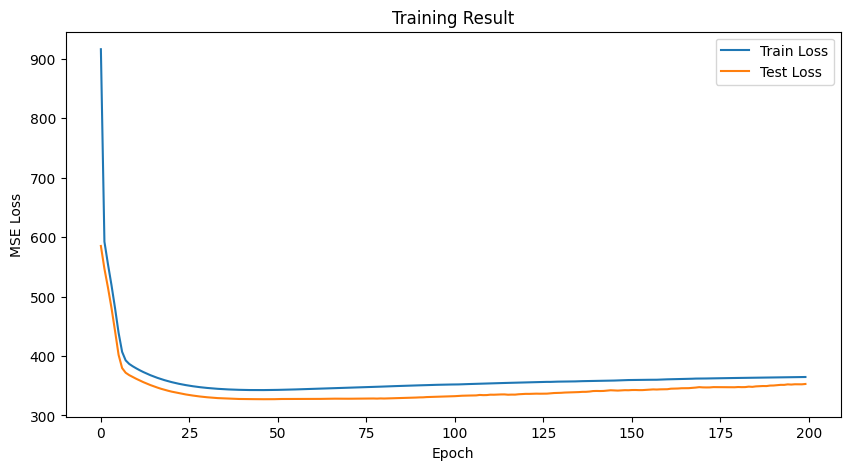

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_loss_list)), train_loss_list, label="Train Loss")
plt.plot(np.arange(len(test_loss_list)), test_loss_list, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Result")
plt.legend(loc = "best")
plt.show()